In [1]:
import pandas
import numpy as np
from pandas import read_csv
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
data = read_csv(url, names = names)

In [3]:
print("Verinin yapısı: {}".format(data.shape))

Verinin yapısı: (768, 9)


In [4]:
class_counts = data.groupby("class").size()
print(class_counts)    # Sınıfların dağılımı homojen değil. Bu yüzden performansı ölçmek için sadece doğruluk oranı kullanılmamalı.
#Farklı performans ölçme yöntemleri de kullanılmalı.

class
0    500
1    268
dtype: int64


In [5]:
X = data.iloc[: , 0:8]
Y = data.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) #stratify : tabakalı eğitim

In [8]:
model = LogisticRegression(solver = "lbfgs", max_iter = 5000) #Kullanılıcak modeli tanımladık
model.fit(x_train, y_train) # Öğrenme işlemi gerçekleştirildi

y_pred = model.predict(x_test) # Test verisi için tahmin
y_pred1 = model.predict(x_train) # Eğitim verisi için tahmin

In [9]:
from sklearn.metrics import accuracy_score #Performans kriteri olarak doğruluk oranını seçtik
print("Eğitim verisi için doğruluk oranı: ", accuracy_score(y_pred1, y_train))
print("Test verisi için doğruluk oranı: ", accuracy_score(y_pred, y_test))


Eğitim verisi için doğruluk oranı:  0.7653631284916201
Test verisi için doğruluk oranı:  0.7792207792207793


In [10]:
from sklearn.metrics import precision_score, recall_score # Hassaslık ve Duyarlılık skorları
print("Test verisi için Hassaslık-kesinlik(Precision): ", precision_score(y_test, y_pred))
print("Test verisi için Duyarlılık(Recall): ", recall_score(y_test, y_pred))

Test verisi için Hassaslık-kesinlik(Precision):  0.7090909090909091
Test verisi için Duyarlılık(Recall):  0.527027027027027


In [14]:
from sklearn.metrics import precision_score, recall_score # Hassaslık ve Duyarlılık skorları
print(" Eğitim verisi için Hassaslık-kesinlik(Precision): ", precision_score(y_train, y_pred1))
print("Eğitim verisi için Duyarlılık(Recall): ", recall_score(y_train, y_pred1))
#Recall(Duyarlılık): Hasta olanları tespit etme oranı = TP/(TP+FN)
#Precision(Kesinlik): Hasta dediklerimizin gerçekten kaçı hasta ? = TP/(TP+FP)


 Eğitim verisi için Hassaslık-kesinlik(Precision):  0.7125
Eğitim verisi için Duyarlılık(Recall):  0.5876288659793815


In [19]:
from sklearn.metrics import confusion_matrix # Sınıflandırma tablosu
print("Test verisi için sınıflandırma tablosu: \n", (confusion_matrix(y_test, y_pred)))


Test verisi için sınıflandırma tablosu: 
 [[141  16]
 [ 35  39]]


Test verisi için


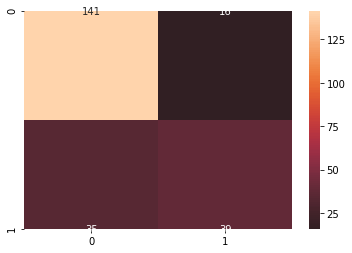

In [26]:
import seaborn as sns
print ("Test verisi için")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt='d')

In [27]:
from sklearn.metrics import classification_report
print("Test verisi için sınıflandırma raporu: \n", (classification_report(y_test, y_pred)))

Test verisi için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6046511627906976

In [29]:
from sklearn.metrics import roc_auc_score
alan = roc_auc_score(y_test, y_pred)
print("Test verisi için ROC Eğrisi altındaki alan: ", alan)

Test verisi için ROC Eğrisi altındaki alan:  0.7125580995007746


In [30]:
from sklearn.metrics import cohen_kappa_score
print("Test verisi için cohen kappa skoru: \n", (cohen_kappa_score(y_test, y_pred)))

Test verisi için cohen kappa skoru: 
 0.4560690705942102


In [31]:
#REGRESYON İÇİN PERFORMANS ÖLÇME
from sklearn.datasets import load_boston
boston = load_boston()

In [32]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [33]:
import pandas as pd
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [34]:
bos["PRICE"] = boston.target

In [35]:
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [36]:
X1 = bos.drop("PRICE", axis = 1) # Girdi
Y1 = bos["PRICE"] # Çıktı

In [37]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.3, random_state = 0)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Veri normalize aşaması.
sc.fit(x_train1) # Öğrenme aşaması.
x_train_std = sc.transform(x_train1) # Eğitim verisi normalize edildi.
x_test_std = sc.transform(x_test1) # Test verisi normalize edildi.

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_std, y_train1)#Normalize edilmiş eğitim verisinin girdisi ve çıktı öğrenme sürecine alındı(fit methodu ile)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#Korelasyon katsayısı (R-kare)' na göre performans ölçümü
print("R-kare(eğitim): {:.3f}".format(model.score(x_train_std, y_train1)))
print("R-kare(test): {:.3f}".format(model.score(x_test_std, y_test1)))

R-kare(eğitim): 0.765
R-kare(test): 0.673


In [42]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test_std)
y_pred1 = model.predict(x_train_std)

In [43]:
print("Test Verisi İçin Ortalama Hata Kare (MSE) %.3f" % mean_squared_error(y_test1, y_pred))
print("Eğitim Verisi İçin Ortalama Hata Kare (MSE) %.3f" % mean_squared_error(y_train1, y_pred1))
print("\n")
print("Eğitim Verisi İçin R-Kare: %.3f" % r2_score(y_train1, y_pred1))
print("Test Verisi İçin R-Kare: %.3f" % r2_score(y_test1, y_pred))

Test Verisi İçin Ortalama Hata Kare (MSE) 27.196
Eğitim Verisi İçin Ortalama Hata Kare (MSE) 19.958


Eğitim Verisi İçin R-Kare: 0.765
Test Verisi İçin R-Kare: 0.673
